In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('bitcoin.csv')

In [4]:
data.dtypes

Date      object
Price    float64
dtype: object

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import datetime as dt
data['Date']

0     2019-05-23
1     2019-05-24
2     2019-05-25
3     2019-05-26
4     2019-05-27
5     2019-05-28
6     2019-05-29
7     2019-05-30
8     2019-05-31
9     2019-06-01
10    2019-06-02
11    2019-06-03
12    2019-06-04
13    2019-06-05
14    2019-06-06
15    2019-06-07
16    2019-06-08
17    2019-06-09
18    2019-06-10
19    2019-06-11
20    2019-06-12
21    2019-06-13
22    2019-06-14
23    2019-06-15
24    2019-06-16
25    2019-06-17
26    2019-06-18
27    2019-06-19
28    2019-06-20
29    2019-06-21
30    2019-06-22
31    2019-06-23
32    2019-06-24
33    2019-06-25
34    2019-06-26
35    2019-06-27
36    2019-06-28
37    2019-06-29
38    2019-06-30
39    2019-07-01
40    2019-07-02
41    2019-07-03
42    2019-07-04
43    2019-07-05
44    2019-07-06
45    2019-07-07
46    2019-07-08
47    2019-07-09
48    2019-07-10
49    2019-07-11
50    2019-07-12
51    2019-07-13
52    2019-07-14
53    2019-07-15
54    2019-07-16
55    2019-07-17
56    2019-07-18
57    2019-07-19
58    2019-07-

from 2019-05-23 to 2020-05-23


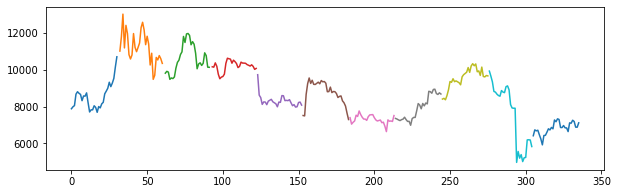

In [9]:
print('from 2019-05-23 to 2020-05-23')
plt.rcParams['figure.figsize'] = [10,3]
data.iloc[0:31,:]['Price'].plot()
data.iloc[32:61,:]['Price'].plot()
data.iloc[62:92,:]['Price'].plot()
data.iloc[93:123,:]['Price'].plot()
data.iloc[123:153,:]['Price'].plot()
data.iloc[153:184,:]['Price'].plot()
data.iloc[184:214,:]['Price'].plot()
data.iloc[214:245,:]['Price'].plot()
data.iloc[245:276,:]['Price'].plot()
data.iloc[276:305,:]['Price'].plot()
data.iloc[305:336,:]['Price'].plot()

starts from 2019-06-01 


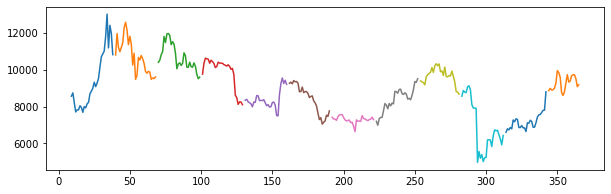

In [10]:
print('starts from 2019-06-01 ')
plt.rcParams['figure.figsize'] = [10,3]
data.iloc[9:39,:]['Price'].plot()
data.iloc[40:69,:]['Price'].plot()
data.iloc[70:100,:]['Price'].plot()
data.iloc[101:130,:]['Price'].plot()
data.iloc[131:161,:]['Price'].plot()
data.iloc[162:191,:]['Price'].plot()
data.iloc[192:222,:]['Price'].plot()
data.iloc[223:253,:]['Price'].plot()
data.iloc[254:282,:]['Price'].plot()
data.iloc[283:313,:]['Price'].plot()
data.iloc[314:343,:]['Price'].plot()
data.iloc[344:366,:]['Price'].plot()



In [185]:
data = data.set_index('Date')

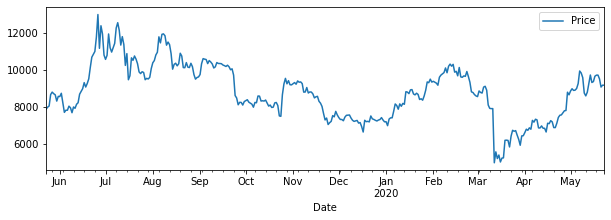

In [186]:
data.plot()

# checking stationary

In [187]:
def stationary(data):
    from statsmodels.tsa.stattools import adfuller
    dftest=adfuller(data, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dfoutput[1] > 0.05:
        print('it is not stationary')
    else:
        print('it is stationary')

In [188]:
# null hypothesis : time series is not stationary
# alternate hypothesis : time series is stationary 

In [189]:
stationary(data)

Test Statistic           -2.476736
p-value                   0.121238
Lags Used                 0.000000
No. of Obs              366.000000
Critical Value (1%)      -3.448344
Critical Value (5%)      -2.869469
Critical Value (10%)     -2.570994
dtype: float64
it is not stationary


it is not stationary becouse p- value is > 0.05 to do stationary we have to do some differencing and transformation techniques

# trainsformation and differencing methods

In [190]:
data.head(2)

,Price
Date,
2019-05-23,7881.846680
2019-05-24,7987.371582


In [191]:
#stationary((data - data.rolling(window = 2).mean()).dropna())

In [192]:
#data_log  = np.log(data['Price'])
#method_1 = data_log -  data_log.rolling(window = 2).mean()
#method_1 = method_1.dropna()

In [193]:
#stationary(method_1)

In [194]:
#data_log  = np.log(data['Price'])
#method_2 = data_log - data_log.shift()
#method_2 = method_2.dropna()

In [195]:
method_2 = data - data.shift(12)
method_2 = method_2.dropna()

In [196]:
stationary(method_2)

Test Statistic           -4.500841
p-value                   0.000196
Lags Used                17.000000
No. of Obs              337.000000
Critical Value (1%)      -3.449904
Critical Value (5%)      -2.870155
Critical Value (10%)     -2.571360
dtype: float64
it is stationary


# checking trend and seasonality

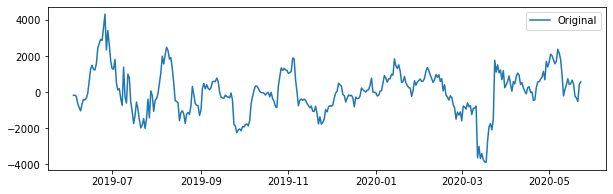

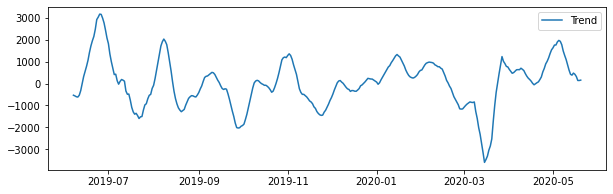

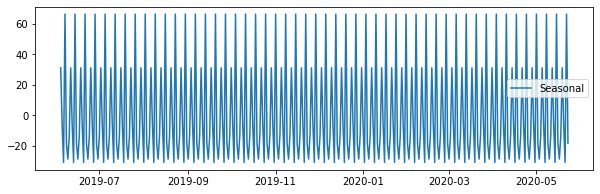

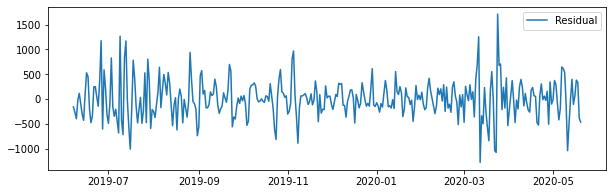

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(method_2)

plt.plot(method_2, label = 'Original')
plt.legend()

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend()

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend()

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend()

In [198]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

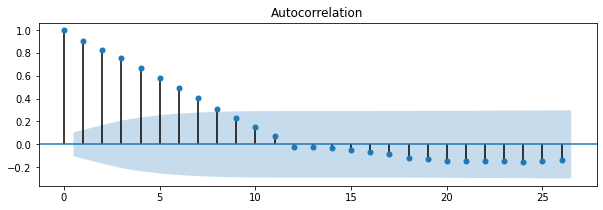

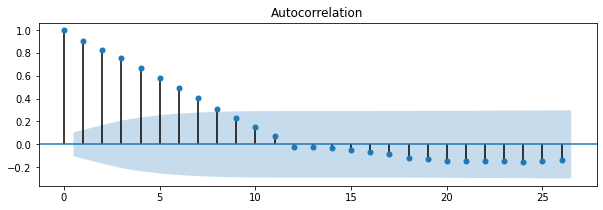

In [219]:
pyplot.figure()
plot_acf(method_2,ax=pyplot.gca())

In [200]:
from warnings import filterwarnings
filterwarnings('ignore')
import itertools
from statsmodels.tsa.arima_model import ARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
for param in pdq:
    try:
        mod = ARIMA(method_2, order=param)
        results = mod.fit()
        print(param,'--->',results.aic)
    except:
        continue

(0, 0, 0) ---> 6049.039546895098
(0, 0, 1) ---> 5761.005519002487
(0, 1, 0) ---> 5443.123387358076
(0, 1, 1) ---> 5442.805039523001
(1, 0, 0) ---> 5444.1302600028675
(1, 0, 1) ---> 5445.755533386835
(1, 1, 0) ---> 5442.939424288426
(1, 1, 1) ---> 5444.7414753313105


In [201]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(0,1,1))  
results_ARIMA = model.fit() 


In [202]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                  366
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2689.664
Method:                       css-mle   S.D. of innovations            376.103
Date:                Sun, 06 Jun 2021   AIC                           5385.329
Time:                        11:29:32   BIC                           5397.037
Sample:                    05-24-2019   HQIC                          5389.981
                         - 05-23-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.5385     18.087      0.196      0.845     -31.911      38.988
ma.L1.D.Price    -0.0802      0.051     -1.564      0.118      -0.181       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           12.4696           +0.0000j           12.4696            0.0000
-----------------------------------------------------------------------------
"""

In [203]:
len(data['Price'])

367

In [204]:
data['forcast'] = results_ARIMA.predict(start = 337, end = 367)

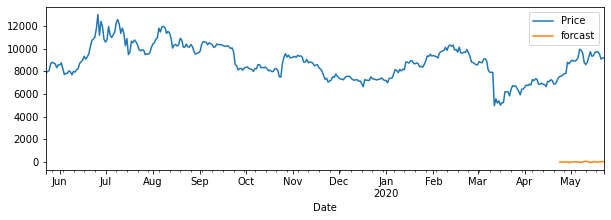

In [205]:
data[['Price','forcast']].plot()

In [206]:
from warnings import filterwarnings
filterwarnings('ignore')
import itertools
import statsmodels.api as sm
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(method_2, order=param)
        results = mod.fit()
        print(param,'--->',results.aic)
    except:
        continue

(0, 0, 0) ---> 6047.291839710928
(0, 0, 1) ---> 5759.192346804832
(0, 1, 0) ---> 5441.130597438408
(0, 1, 1) ---> 5440.810142287786
(1, 0, 0) ---> 5442.1536071737655
(1, 0, 1) ---> 5443.791773785577
(1, 1, 0) ---> 5440.945882037113
(1, 1, 1) ---> 5442.762944495116


In [220]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data['Price'], order = (0,1,1), seasonal_order= (1,1,0,12))
results = model.fit()

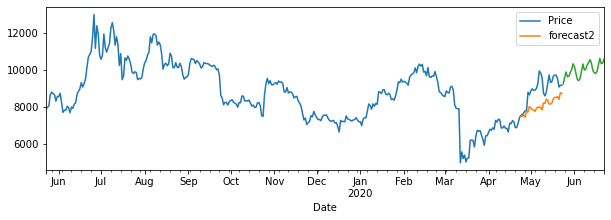

In [230]:
data['forecast2'] = results.predict(start = 337, end = 367, dynamic = True)
data[['Price','forecast2']].plot()
results.forecast(steps=30).plot()

In [227]:
data.tail()

,Price,forcast,forecast2
Date,,,
2020-05-19,9729.038086,-2.529871,8501.496063
2020-05-20,9522.981445,3.138094,8565.054758
2020-05-21,9081.761719,20.314902,8413.660283
2020-05-22,9182.577148,40.551348,8769.415437
2020-05-23,9180.045898,-1.294400,8729.315126


In [226]:
results.forecast(steps=30)

2020-05-24     9247.610968
2020-05-25     9592.572143
2020-05-26     9898.283079
2020-05-27     9638.923377
2020-05-28     9672.104605
2020-05-29     9871.310417
2020-05-30    10024.709354
2020-05-31    10343.444766
2020-06-01    10182.578864
2020-06-02     9830.830327
2020-06-03     9495.433471
2020-06-04     9422.188432
2020-06-05     9552.569964
2020-06-06     9953.574864
2020-06-07    10332.751795
2020-06-08    10005.439287
2020-06-09    10045.889399
2020-06-10    10289.037991
2020-06-11    10397.079335
2020-06-12    10568.777854
2020-06-13    10386.902521
2020-06-14     9993.558320
2020-06-15     9860.959034
2020-06-16     9820.589238
2020-06-17     9921.767039
2020-06-18    10296.716893
2020-06-19    10641.739065
2020-06-20    10346.018203
2020-06-21    10383.088970
2020-06-22    10605.808313
Freq: D, dtype: float64